In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

Summary Statistics:
                ph    Turbidity  Temperature
count  3275.000000  3275.000000  3275.000000
mean      7.073777     3.967093    26.196267
std       1.524766     0.780304    26.391021
min       0.227499     1.450000     0.230000
25%       6.125329     3.440020     7.927734
50%       7.039094     3.955091    16.036923
75%       7.992535     4.500432    35.480591
max      14.000000     6.739000   100.931632


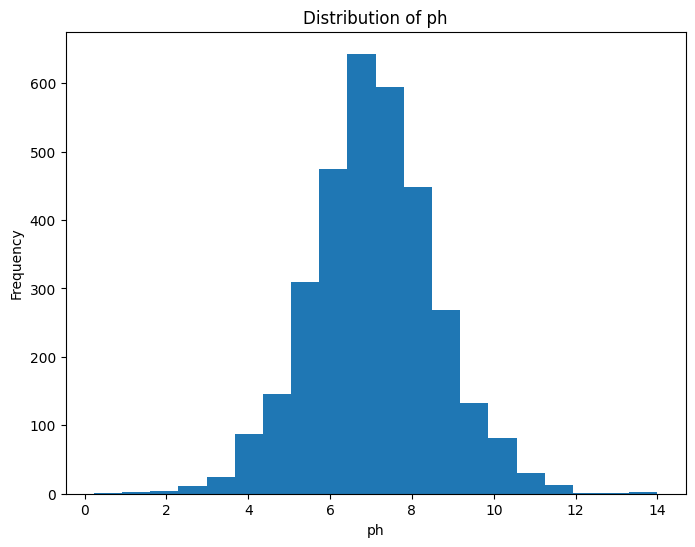

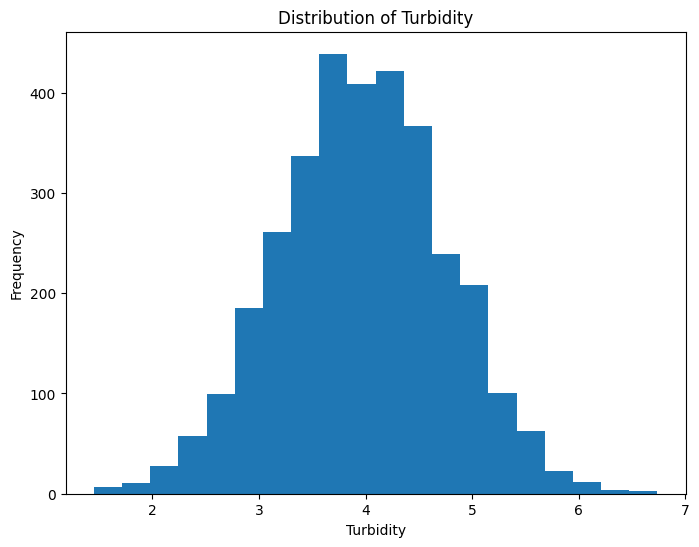

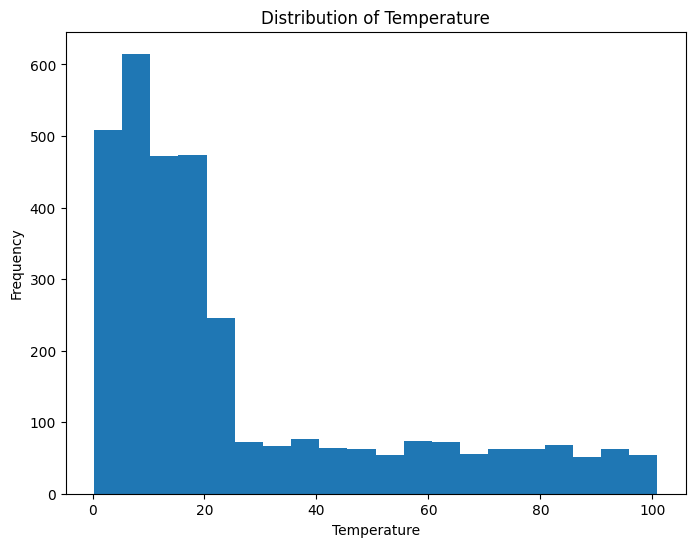

Unique values in Water Type: ['Impure' 'Pure']
Correlation Matrix:
                   ph  Turbidity  Temperature
ph           1.000000  -0.039078     0.006891
Turbidity   -0.039078   1.000000     0.007415
Temperature  0.006891   0.007415     1.000000


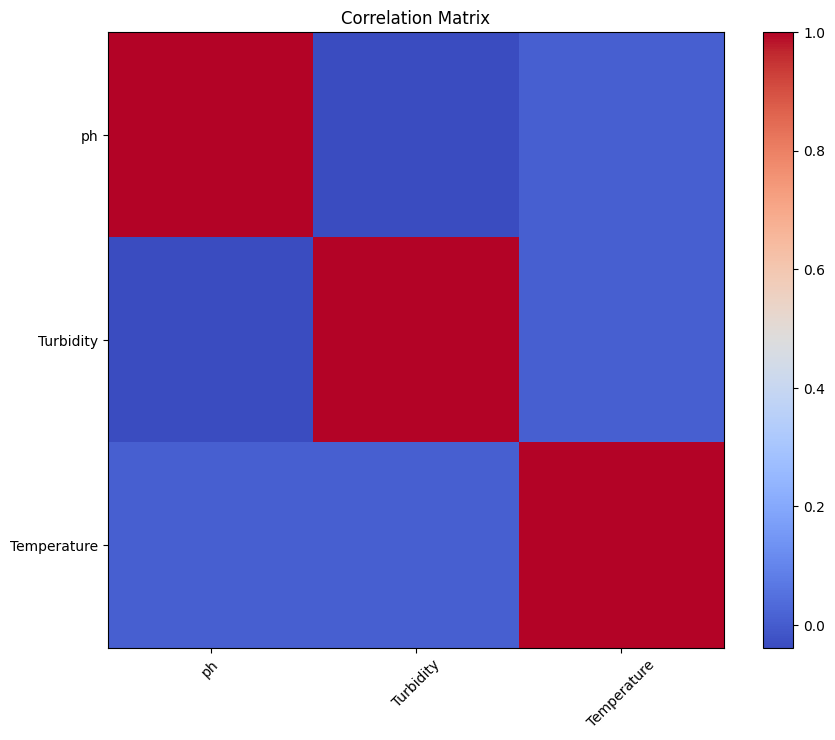

In [2]:
# Load the dataset
dataset = pd.read_csv("wqms_dataset.csv")

# Summary statistics
summary_stats = dataset.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualize distributions (for numerical features)
numerical_features = dataset.select_dtypes(include=[np.number])
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(dataset[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Check unique values (for categorical features)
categorical_features = dataset.select_dtypes(exclude=[np.number])
for column in categorical_features.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Check correlations (only for numerical features)
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


In [3]:
def train_model_and_save(data_file, model_file):
    # Load the dataset
    data = pd.read_csv(data_file)

    # Convert 'Water Type' to binary labels
    data['Water Type'] = data['Water Type'].map({'Impure': 0, 'Pure': 1})

    # Split features and target variable
    X = data.drop(columns=['Water Type'])
    y = data['Water Type']

    # Split the data into training and testing sets
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier
    clf = RandomForestClassifier()

    # Train the classifier
    clf.fit(X_train, y_train)

    # Save the trained model
    with open(model_file, 'wb') as file:
        pickle.dump(clf, file)

def predict_water_purity(model_file, pH, turbidity, temperature):
    # Load the trained model
    with open(model_file, 'rb') as file:
        clf = pickle.load(file)

    # Make prediction
    prediction = clf.predict([[pH, turbidity, temperature]])

    # Return the result
    return "Pure" if prediction[0] == 1 else "Impure"

# Train the model and save it
train_model_and_save("wqms_dataset.csv", "water_purity_model.pkl")






In [4]:
# print("\nEnter water parameters to predict purity:")
# pH = float(input("Enter pH value: "))
# turbidity = float(input("Enter Turbidity value: "))
# temperature = float(input("Enter Temperature value: "))
pH =6
turbidity = 4
temperature = 10
result = predict_water_purity("water_purity_model.pkl", pH, turbidity, temperature)
print("The prediction for example data: ", result)

The prediction for example data:  Pure


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
